In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8-world.yaml")  # build a new model from scratch
model = YOLO("yolov8l-world.pt")  # load a pretrained model (recommended for training)
# model.set_classes(['people', 'car'])
# Use the model
# model.train(data="coco128.yaml", epochs=3)  # train the model
# metrics = model.val()  # evaluate model performance on the validation set
# results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image

WARNING ⚠️ no model scale passed. Assuming scale='n'.


In [2]:
backbone_all = model.model.model[:9]

In [3]:
backbone_all

Sequential(
  (0): Conv(
    (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (2): C2f(
    (cv1): Conv(
      (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (m): ModuleList(
      (0-2): 3 x Bottleneck(
        (cv1): 

In [4]:
from torch import nn
backbone = nn.ModuleList()

In [6]:
backbone.append(backbone_all[:2])
backbone.append(backbone_all[2:4])
backbone.append(backbone_all[4:6])
backbone.append(backbone_all[6:9])

ModuleList(
  (0): Sequential(
    (0): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    )
  )
  (1): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_run

In [20]:
import torch
a = torch.randn(1, 3, 1024, 1024).cuda()
print(backbone(a).shape)

torch.Size([1, 512, 32, 32])


In [2]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'people', 1: 'car'}
obb: None
orig_img: array([[[122, 148, 172],
        [120, 146, 170],
        [125, 153, 177],
        ...,
        [157, 170, 184],
        [158, 171, 185],
        [158, 171, 185]],

       [[127, 153, 177],
        [124, 150, 174],
        [127, 155, 179],
        ...,
        [158, 171, 185],
        [159, 172, 186],
        [159, 172, 186]],

       [[128, 154, 178],
        [126, 152, 176],
        [126, 154, 178],
        ...,
        [158, 171, 185],
        [158, 171, 185],
        [158, 171, 185]],

       ...,

       [[185, 185, 191],
        [182, 182, 188],
        [179, 179, 185],
        ...,
        [114, 107, 112],
        [115, 105, 111],
        [116, 106, 112]],

       [[157, 157, 163],
        [180, 180, 186],
        [185, 186, 190],
        ...,
        [107,  97, 103],
        [102,  92,  98],
   

In [2]:
results[0].boxes.xyxy.long().cpu().numpy().tolist()

[[0, 229, 807, 775],
 [223, 405, 343, 859],
 [51, 399, 247, 902],
 [668, 389, 810, 881],
 [0, 428, 79, 1073],
 [0, 252, 33, 325],
 [137, 473, 148, 509],
 [428, 149, 529, 192],
 [285, 482, 300, 522]]

In [3]:
from PIL import Image
from PIL import ImageDraw
from copy import deepcopy
def draw_rectangle(image, rectangle_coordinates, outline_color="red", thickness=2):
    # 打开图像
    image = deepcopy(image)
    # 创建绘图对象
    draw = ImageDraw.Draw(image)
    for rectangle_coordinate in rectangle_coordinates:
        # print()
        draw.rectangle(rectangle_coordinate, outline=outline_color, width=thickness)
    # 绘制矩形
    # 保存结果
    # image.save(output_path)
    return image

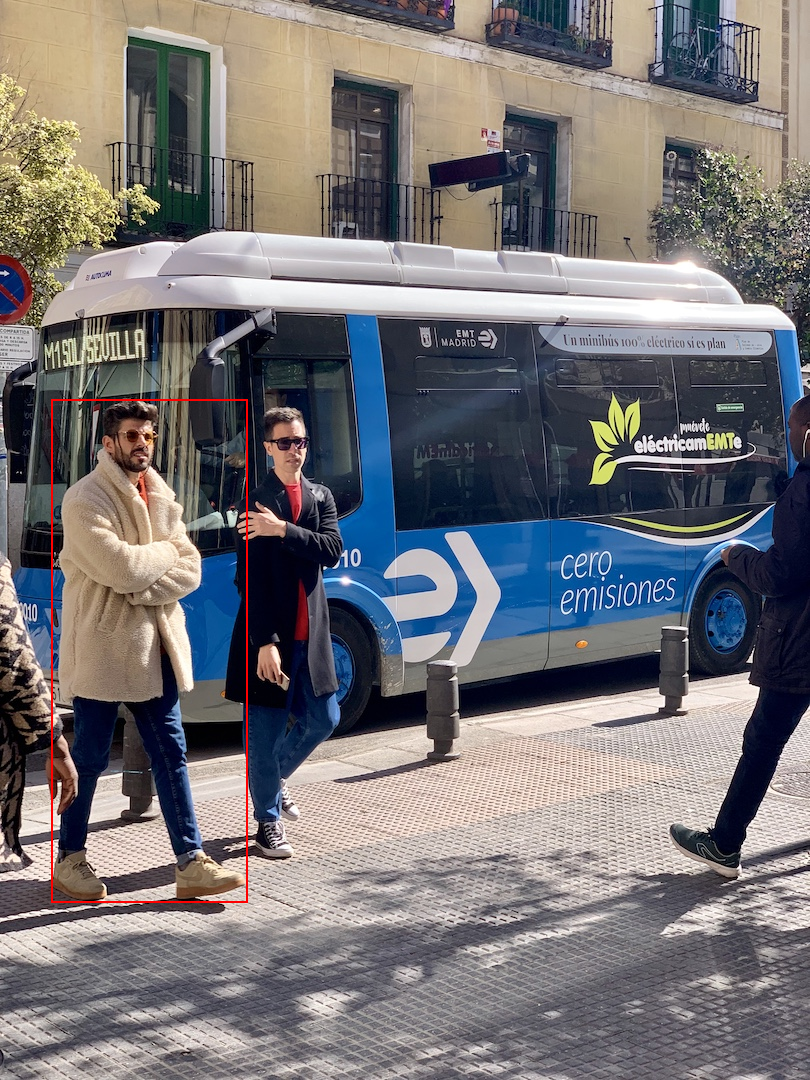

In [9]:
img = Image.open("bus.jpg")
# w, h = img.size
bbox = [[51, 399, 247, 902]]
# bbox = results[0].boxes.xyxy.long().cpu().numpy()
# [365, 294, 624, 740],car:[0, 431, 1024, 755],person:[362, 238, 645, 709],car:[0, 462, 1024, 755],car:[0, 462, 1024, 755]
draw_rectangle(img, bbox[:2])

In [5]:
model

YOLOWorld(
  (model): WorldModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0-2): 3 x Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inpla

In [2]:
from typing import List

import os
import cv2
import numpy as np
import supervision as sv
import torch
from tqdm import tqdm
# from inference.models import YOLOWorld
from ultralytics.inference_model.yolo_world import YOLOWorld
# from inference.models import YOLOWorld

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# EFFICIENT_SAM_MODEL = load(device=DEVICE)
YOLO_WORLD_MODEL = YOLOWorld(model_path="yolov8l-world.pt")

BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator()
MASK_ANNOTATOR = sv.MaskAnnotator()
LABEL_ANNOTATOR = sv.LabelAnnotator()

def process_categories(categories: str) -> List[str]:
    return [category.strip() for category in categories.split(',')]


def annotate_image(
    input_image: np.ndarray,
    detections: sv.Detections,
    categories: List[str],
    with_confidence: bool = False,
) -> np.ndarray:
    labels = [
        (
            f"{categories[class_id]}: {confidence:.3f}"
            if with_confidence
            else f"{categories[class_id]}"
        )
        for class_id, confidence in
        zip(detections.class_id, detections.confidence)
    ]
    # output_image = MASK_ANNOTATOR.annotate(input_image, detections)
    output_image = BOUNDING_BOX_ANNOTATOR.annotate(input_image, detections)
    output_image = LABEL_ANNOTATOR.annotate(output_image, detections, labels=labels)
    return output_image

def process_image(
    input_image: np.ndarray,
    yolo_model: YOLOWorld,
    categories: str,
    confidence_threshold: float = 0.3,
    iou_threshold: float = 0.5,
    with_segmentation: bool = True,
    with_confidence: bool = False,
    with_class_agnostic_nms: bool = False,
) -> np.ndarray:
    categories = process_categories(categories)
    # YOLO_WORLD_MODEL.set_classes(categories)
    yolo_model.set_classes(categories)
    # results = yolo_model(input_image)
    results = yolo_model.infer(input_image, confidence=confidence_threshold)
    detections = sv.Detections.from_inference(results)
    detections = detections.with_nms(
        class_agnostic=with_class_agnostic_nms,
        threshold=iou_threshold
    )
    # if with_segmentation:
    #     detections.mask = inference_with_boxes(
    #         image=input_image,
    #         xyxy=detections.xyxy,
    #         model=EFFICIENT_SAM_MODEL,
    #         device=DEVICE
    #     )
    output_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2BGR)
    output_image = annotate_image(
        input_image=output_image,
        detections=detections,
        categories=categories,
        with_confidence=with_confidence
    )
    return cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

In [7]:
import  cv2
image = cv2.imread('bus.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
out = process_image(image, YOLO_WORLD_MODEL, 'person,bus,window')

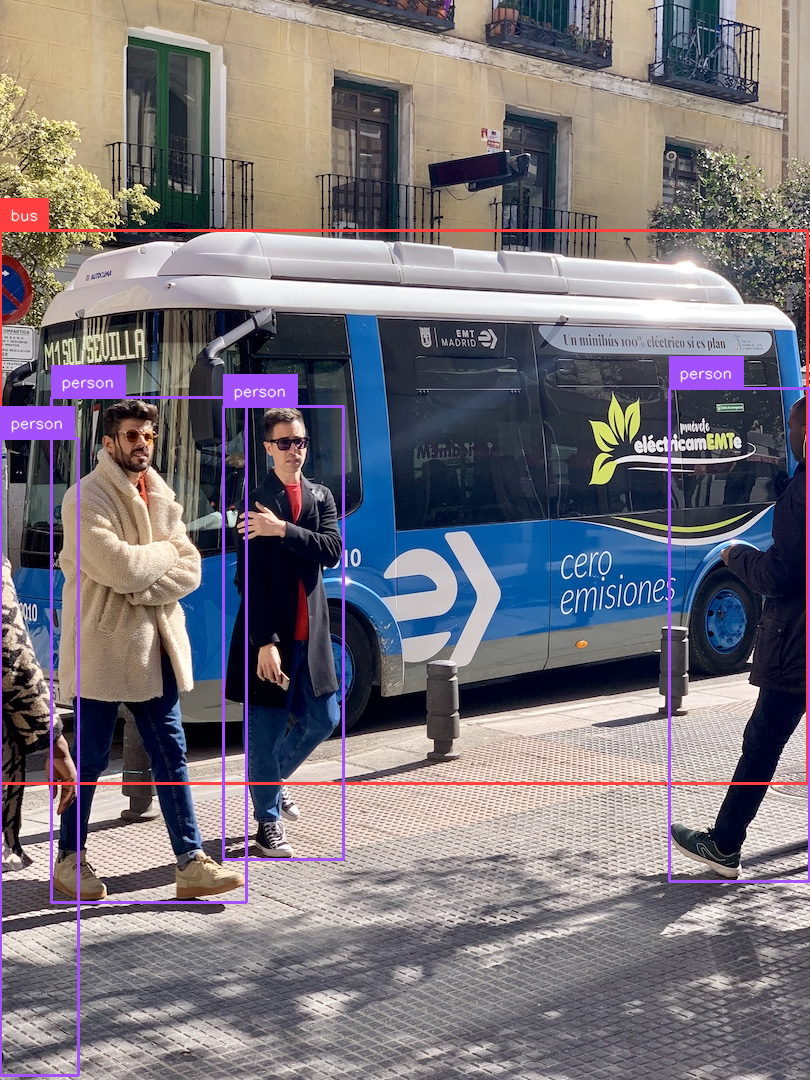

In [8]:
from PIL import Image
Image.fromarray(out)

In [9]:
model

NameError: name 'model' is not defined